# Comparison of Regression Models on Predicting Medical Costs

#1: SEE THE BIG PICTURE

In [ ]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

In [ ]:
def loadMedicalData():
  insurance = pd.read_csv('/content/sample_data/insurance.csv')
  return insurance

insurance = loadMedicalData()
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
print("The dataset is 55.68KB in size")

The dataset is 55.68KB in size


In [ ]:
print(insurance.shape)
print("This dataset has 1338 entries and 7 columns")

(1338, 7)
This dataset has 1338 entries and 7 columns


In [ ]:
insurance.info()
print("----sex value counts------")
print(insurance["sex"].value_counts())
print("----smoker value counts------")
print(insurance["smoker"].value_counts())
print("----region value counts------")
print(insurance["region"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
----sex value counts------
male      676
female    662
Name: sex, dtype: int64
----smoker value counts------
no     1064
yes     274
Name: smoker, dtype: int64
----region value counts------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [ ]:
print(insurance[insurance.isnull().any(axis=1)])
print("There is no missing data in this dataset")

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
There is no missing data in this dataset


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#2: DATA DISCOVERY, CLEANING, AND SCALING

In [ ]:
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
corr_matrix = insurance.corr()
corr_matrix.shape

<ipython-input-682-cab132ef5ee6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = insurance.corr()


(4, 4)

In [ ]:
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

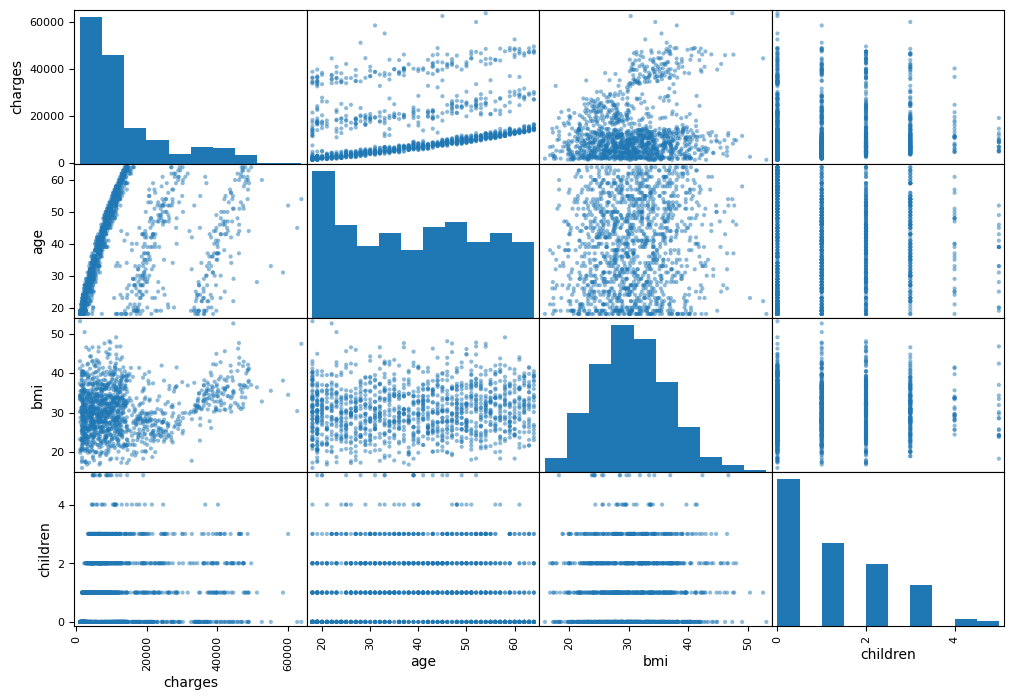

In [ ]:
attributes = ["charges", "age", "bmi", "children"];
scatter_matrix(insurance[attributes], figsize=(12, 8));

In [ ]:
train_set, test_set = train_test_split(insurance, test_size=0.2, random_state=42)

y_train = train_set["charges"].to_numpy()
y_train = np.reshape(y_train, (len(y_train), 1))
X_train = train_set.drop("charges", axis=1)

y_test = test_set["charges"].to_numpy()
y_test = np.reshape(y_test, (len(y_test), 1))
X_test = test_set.drop("charges", axis=1)

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

num_attribs = ["age", "bmi", "children"]
cat_attribs = ["smoker", "region", "sex"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

#3. IMPLEMENT GRADIENT DESCENT

In [ ]:
class MyLinearRegression:
  """
  Define what a linear regressor can do

   It is a supervised machine learning model used for regression problems. A
   linear regrssor can predict a numerical output based on the input features
   given to it.

  """

  def __init__ (self):
    """
    Initialize the regressor
    """
    self.theta = [];
    self.alpha = [];
    self.cost  = [];

  def plotTestFitUsingGradientDescent(self, X_train, y_train, alpha, iters):
    """
    Train the regressor using gradient descent
    """
    X_b = np.c_[np.ones((len(X_train), 1)), X_train]
    self.theta = np.random.randn(len(X_b[0]), 1)
    self.alpha = alpha
    self.gradientDescent(X_b, y_train, self.theta, self.alpha, iters)
    return self.cost

  def fitUsingGradientDescent(self, X_train, y_train):
    """
    Train the regressor using gradient descent
    """
    X_b = np.c_[np.ones((len(X_train), 1)), X_train]
    self.theta = np.random.randn(len(X_b[0]), 1)
    self.alpha = 0.330
    self.gradientDescent(X_b, y_train, self.theta, self.alpha, 20)
    return self.cost

  def fitUsingNormalEquation(self, X_train, y_train):
    """
    Training using the Normal (close form) equation
    """
    X_b = np.c_[np.ones((len(X_train), 1)), X_train]
    theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

    self.theta = theta

  def gradientDescent(self, X_train, y_train, theta, alpha, iters):
    """
    Implementatation of the gradient descent
    INPUT:
    alpha: the learning rate
    iters: number of iterations

    OUTPUT:
    theta: updated value for theta
    cost: value of the cost function
    """
    m = len(X_train)
    for iteration in range(iters):
      gradients = 2/m * X_train.T.dot(X_train.dot(theta) - y_train)
      theta = theta - alpha * gradients
      self.cost.append(np.linalg.norm(1/m * (X_train.dot(theta) - y_train).T.dot(X_train.dot(theta) - y_train)))

    self.theta = theta

  def predict(self, X_test):
    """
    Predicting the label
    """
    X_b = np.c_[np.ones((len(X_test), 1)), X_test]
    y_predict = X_b.dot(self.theta)
    return y_predict

  def __str__(self):
    """
    Print out the parameter out when call print()
    """
    print("Parameter vector is %f" % self.theta)

myGradientDescentModel = MyLinearRegression()

myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)

[173251943.75760728,
 109365288.21289504,
 78060320.89728272,
 61477903.974786945,
 52134105.480929896,
 46609972.57220906,
 43228965.08578719,
 41110382.78556147,
 39762190.70021173,
 38895586.4759158,
 38334833.57415571,
 37970327.36892513,
 37732592.20230949,
 37577124.764620826,
 37475222.174812675,
 37408286.57251863,
 37364227.84826216,
 37335166.503563695,
 37315956.30159181,
 37303229.6716641]

After trying many different learning rates it was found that the best learning rate is 0.330


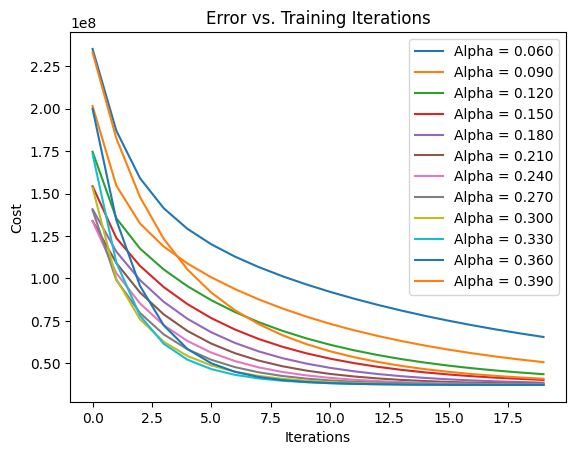

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

for i in range(6, 40, 3):
  myGradientDescentModel.cost = []
  myGradientDescentModel.plotTestFitUsingGradientDescent(X_train, y_train, i/100, 20)
  plt.plot(range(20), myGradientDescentModel.cost[:], label=f'Alpha = {i/100:.3f}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs. Training Iterations')
plt.legend()

print("After trying many different learning rates it was found that the best learning rate is 0.330")


#4. IMPLEMENT THE NORMAL EQUATION

In [ ]:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

#5. COMPARE DIFFERENT IMPLEMENTATIONS

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

mySGDModel = SGDRegressor()
mySGDModel.fit(X_train, y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print(mySGDModel_rmse)

myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)
y_predict = myGradientDescentModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
myGradientDescentModel_rmse = np.sqrt(mse)
print(myGradientDescentModel_rmse)

myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)
y_predict = myNormalEquationModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
myNormalEquationModel_rmse = np.sqrt(mse)
print(myNormalEquationModel_rmse)

5792.627559409155
5814.445896614317
5796.284659276274


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After looking at the RMSE of each algorithm it seems to be the case that the standard library performed better than both the Normal Equation Model and the Gradient Descent model. So for this dataset the SQD Model would be the best pick. But all of the models were very comparable. I believe for predicting medical bills \$6000 is a bit much to be off by since that is a lot of money. Even for just a rough estimate \$6000 can be make or break for most people so it is not a good prediction overall.

#Task 6. Findings

With this machine learning model we are able to predict the medical charges a person might be billed by a health insurance agency. We take into account the user's age, region of living, sex, smoking habits, bmi, and dependants covered by health insurance. With this information we are able to accurately report the charges incurred from insurance within roughly $6000. When implementing this I discovered that the number of dependents on health insurance did not correlate well with the charges incurred. I would say moving forward with this solution we would need more medical data on the patient specific to the charges themselves. The data is correlated mainly to the person in general and not directly to the charge they are occuring. Therefore, more data would allow for the model to get a more accurate reading of why a certain charge is expensive or cheap.